# Tarea 4. Construyendo la frontera de mínima varianza para dos activos.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pareto_Efficient_Frontier_for_the_Markowitz_Portfolio_selection_problem..png" width="600px" height="400px" />

**Resumen.**
> En esta tarea, construirás la frontera de mínima varianza para dos activos riesgosos usando los datos de mercados internacionales que usamos en la clase 10.

> Construirás portafolios que consisten de dos activos riesgosos, graficarás la frontera de mínima varianza y encontrarás el portafolio de mínima varianza. Repetirás luego el ejercicio para otro par de activos y compararás los beneficios de diversificación en cada caso.

> Por favor, revisar la clase 10 para los datos.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea5_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea5_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Copiar y pegar los datos de rendimientos esperados, volatilidades y correlaciones de mercados internacionales brindados en la Clase 9.

1. Mostrar los DataFrame con los datos (5 puntos).
2. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (5 puntos).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import minimize

In [2]:
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


In [3]:
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


Text(0, 0.5, '$E[x]$')

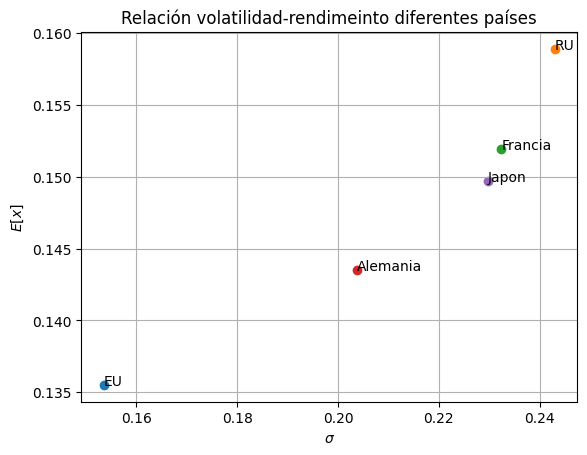

In [4]:
plt.figure()

for i in range(len(annual_ret_summ.T)):
    flag_paises = annual_ret_summ.T.iloc[i]
    name = annual_ret_summ.T.index[i]
    plt.scatter(flag_paises["Volatilidad"], flag_paises["Media"])
    plt.text(flag_paises["Volatilidad"], flag_paises["Media"], name)

plt.grid()
plt.title("Relación volatilidad-rendimeinto diferentes países")
plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")

## 2. Portafolios con Japón y Reino Unido (30 puntos)

Usando los datos del punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los mercados Japoneses y del Reino Unido como activos riesgosos. Puedes pensar en ellos como índices de mercado. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [5]:
N = 101
w = np.linspace(0, 1, N)

e_jp = annual_ret_summ["Japon"]["Media"]
e_ru = annual_ret_summ["RU"]["Media"]

vol_jp = annual_ret_summ["Japon"]["Volatilidad"]
vol_ru = annual_ret_summ["RU"]["Volatilidad"]

corr_jp_ru = corr["Japon"]["RU"]

covariance_jp_ru = corr_jp_ru * vol_jp * vol_ru

In [6]:
portafolio_jp_ru = pd.DataFrame({
    'w_jp': w,
    'w_ru': 1 - w,
    'media': w*e_jp + (1-w)*e_ru,
    'vol': (w**2 * vol_jp**2 + (1-w)**2 * vol_ru**2 + 2*w*(1-w)*covariance_jp_ru)**(1/2)

})

portafolio_jp_ru

,w_jp,w_ru,media,vol
0,0.00,1.00,0.158900,0.243000
1,0.01,0.99,0.158808,0.241402
2,0.02,0.98,0.158716,0.239824
3,0.03,0.97,0.158624,0.238266
4,0.04,0.96,0.158532,0.236727
...,...,...,...,...
96,0.96,0.04,0.150068,0.224272
97,0.97,0.03,0.149976,0.225619
98,0.98,0.02,0.149884,0.226990
99,0.99,0.01,0.149792,0.228383


Text(0, 0.5, '$E[x]$')

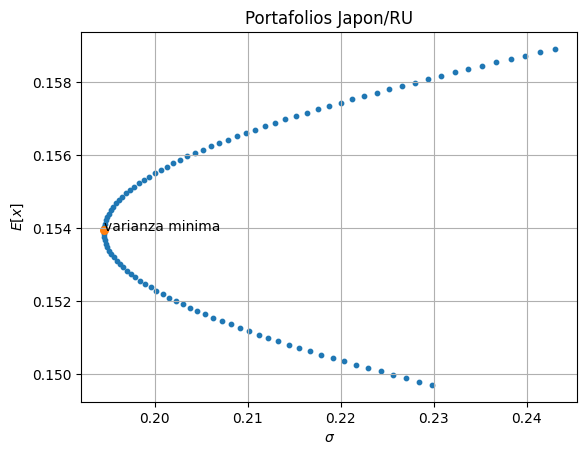

In [7]:
portafolio_jp_ru_varianza_minima = portafolio_jp_ru[portafolio_jp_ru.vol == portafolio_jp_ru.vol.min()]

plt.scatter(portafolio_jp_ru.vol, portafolio_jp_ru.media, s=10)
plt.text(portafolio_jp_ru_varianza_minima["vol"], portafolio_jp_ru_varianza_minima["media"], "varianza minima")
plt.scatter(portafolio_jp_ru_varianza_minima["vol"], portafolio_jp_ru_varianza_minima["media"], s=30)


plt.grid()
plt.title("Portafolios Japon/RU")
plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")

In [8]:
def var2(w, s1, s2, s12):
    return w**2 * s1**2 + (1 - w)**2 * s2**2 + 2 * w * (1 - w) * s12

# Solución
minvar_num = minimize(
    fun=var2,
    x0=0.1,
    args=(vol_jp, vol_ru, covariance_jp_ru),
    bounds=((0,1),)
)

w_min_var_jp = minvar_num["x"]
w_min_var_ru = 1 - w_min_var_jp

print("En el portafolio de mínima varianza el peso de Japón es de " + str(np.round(w_min_var_jp[0] * 100, 2)) +
      "% y el del Reino Unido es de " + str(np.round(w_min_var_ru[0] * 100, 2)) + "%.")

En el portafolio de mínima varianza el peso de Japón es de 54.34% y el del Reino Unido es de 45.66%.


In [9]:
e_jp_ru = w_min_var_jp * e_jp + w_min_var_ru * e_ru
vol_jp_ru = (w_min_var_jp**2 * vol_jp**2 + w_min_var_ru**2 * vol_ru**2 + 2*w_min_var_jp*w_min_var_ru*covariance_jp_ru)**(1/2)

print("El rendimiento esperado del portafolio de mínima varianza es de " + str(np.round(e_jp_ru[0] * 100, 4)) +
      "% y la volatilidad es de " + str(np.round(vol_jp_ru[0] * 100, 4)) + "%.")

El rendimiento esperado del portafolio de mínima varianza es de 15.3901% y la volatilidad es de 19.4492%.


## 3. Mismos activos, distinta correlación (30 puntos)

En este punto se usarán los mismos activos (Japón y Reino Unido) con sus rendimientos esperados y volatilidades, solo que supondremos que el coeficiente de correlación entre sus rendimiento es de 0.5.

1. Nuevamente, construya la frontera de mínima varianza para estos dos activos con el nuevo supuesto de correlación. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [10]:
corr_jp_ru_2 = 0.5

covariance_jp_ru_2 = corr_jp_ru_2 * vol_jp * vol_ru

In [11]:
portafolio_jp_ru_2 = pd.DataFrame({
    'w_jp': w,
    'w_ru': 1 - w,
    'media': w*e_jp + (1-w)*e_ru,
    'vol': (w**2 * vol_jp**2 + (1-w)**2 * vol_ru**2 + 2*w*(1-w)*covariance_jp_ru_2)**(1/2)

})

portafolio_jp_ru_2

,w_jp,w_ru,media,vol
0,0.00,1.00,0.158900,0.243000
1,0.01,0.99,0.158808,0.241727
2,0.02,0.98,0.158716,0.240471
3,0.03,0.97,0.158624,0.239232
4,0.04,0.96,0.158532,0.238009
...,...,...,...,...
96,0.96,0.04,0.150068,0.225625
97,0.97,0.03,0.149976,0.226639
98,0.98,0.02,0.149884,0.227673
99,0.99,0.01,0.149792,0.228727


Text(0, 0.5, '$E[x]$')

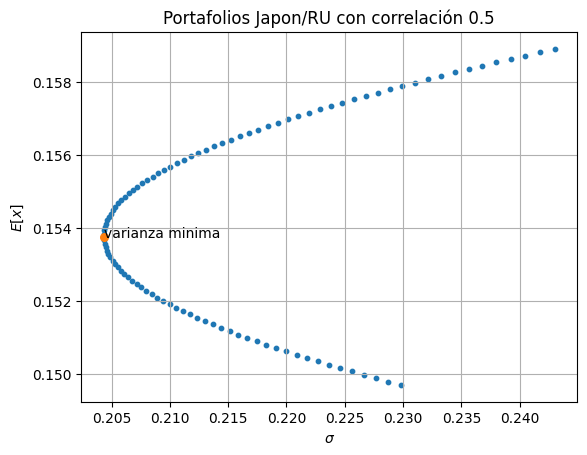

In [12]:
portafolio_jp_ru_varianza_minima_2 = portafolio_jp_ru_2[portafolio_jp_ru_2.vol == portafolio_jp_ru_2.vol.min()]

plt.scatter(portafolio_jp_ru_2.vol, portafolio_jp_ru_2.media, s=10)
plt.scatter(portafolio_jp_ru_varianza_minima_2["vol"], portafolio_jp_ru_varianza_minima_2["media"], s=30)
plt.text(portafolio_jp_ru_varianza_minima_2["vol"], portafolio_jp_ru_varianza_minima_2["media"], "varianza minima")

plt.grid()
plt.title("Portafolios Japon/RU con correlación 0.5")
plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")

In [13]:
portafolio_jp_ru_varianza_minima_2.vol, portafolio_jp_ru_varianza_minima_2.media

(56    0.204333
 Name: vol, dtype: float64,
 56    0.153748
 Name: media, dtype: float64)

In [14]:
def var2(w, s1, s2, s12):
    return w**2 * s1**2 + (1 - w)**2 * s2**2 + 2 * w * (1 - w) * s12

# Solución
minvar_num = minimize(
    fun=var2,
    x0=0.1,
    args=(vol_jp, vol_ru, covariance_jp_ru_2),
    bounds=((0,1),)
)

w_min_var_jp_2 = minvar_num["x"]
w_min_var_ru_2 = 1 - w_min_var_jp_2

print("En el portafolio de mínima varianza con correlación de 0.5, el peso de Japón es de " +
      str(np.round(w_min_var_jp_2[0] * 100, 2)) + "% y el del Reino Unido es de " + str(np.round(w_min_var_ru_2[0] * 100, 2)) + "%.")

En el portafolio de mínima varianza con correlación de 0.5, el peso de Japón es de 55.57% y el del Reino Unido es de 44.43%.


In [15]:
e_jp_ru_2 = w_min_var_jp_2 * e_jp + w_min_var_ru_2 * e_ru
vol_jp_ru_2 = (w_min_var_jp_2**2 * vol_jp**2 + w_min_var_ru_2**2 * vol_ru**2 + 2*w_min_var_jp_2*w_min_var_ru_2*covariance_jp_ru_2)**(1/2)

print("El rendimiento esperado del portafolio de mínima varianza con correlación de 0.5, es de " +
      str(np.round(e_jp_ru_2[0] * 100, 4)) + "% y la volatilidad es de " + str(np.round(vol_jp_ru_2[0] * 100, 4)) + "%.")

El rendimiento esperado del portafolio de mínima varianza con correlación de 0.5, es de 15.3787% y la volatilidad es de 20.433%.


## 4. Gráficos y conclusiones (30 puntos)

1. Usando sus respuestas para los puntos 2 y 3, grafique las dos fronteras encontradas en una sola gráfica, además de los puntos correspondientes a los activos individuales, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, ¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?, ¿cómo puede explicar esta diferencia? (15 puntos).

Text(0, 0.5, '$E[x]$')

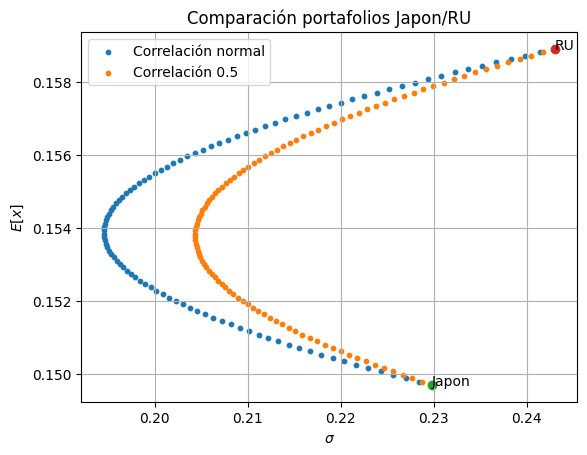

In [16]:
one_portafolio_jp = portafolio_jp_ru_2.query("w_jp == 1")
one_portafolio_ru = portafolio_jp_ru_2.query("w_jp == 0")

plt.scatter(portafolio_jp_ru.vol, portafolio_jp_ru.media, s=10, label = "Correlación normal")
plt.scatter(portafolio_jp_ru_2.vol, portafolio_jp_ru_2.media, s=10, label = "Correlación 0.5")

plt.scatter(one_portafolio_jp.vol, one_portafolio_jp.media)
plt.text(one_portafolio_jp.vol, one_portafolio_jp.media, "Japon")

plt.scatter(one_portafolio_ru.vol, one_portafolio_ru.media)
plt.text(one_portafolio_ru.vol, one_portafolio_ru.media, "RU")

plt.legend()
plt.grid()
plt.title("Comparación portafolios Japon/RU")
plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")

In [17]:
corr_jp_ru, corr_jp_ru_2

(0.3581, 0.5)

Si se comparan ambas graficas, se puede notar una clara diferencia en términos de volatilidad. En el caso "normal", los países tienen una correlación del 36% aproximadamente, mientras que en el segundo caso asumimos que la correlación es del 50%. Con esto se puede observar que mientras menos correlación entre los activos haya, menos volatilidad habrá. Esto pruba que mientras más diversificado sea un portafolio, mejor es para el inversionista, ya que se puede obtener el mismo rendimiento, con una volatilidad más baja.

## 5. Frontera y portafolio de mínima varianza con los 5 índices de mercado
Usando los datos del punto 1:

1. Construya la frontera de mínima varianza para los portafolios que se pueden crear con todos los índices de mercado. Puedes pensar en ellos como índices de mercado. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame.
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza?.

In [18]:
S = np.diag(annual_ret_summ.loc["Volatilidad"]).astype(float)
S

array([[0.1535, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.243 , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.2324, 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.2038, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.2298]])

In [19]:
sigma = S.dot(corr).dot(S)
sigma

array([[0.02356225, 0.01866144, 0.01568916, 0.01151538, 0.00939355],
       [0.01866144, 0.059049  , 0.03060847, 0.02112173, 0.01999681],
       [0.01568916, 0.03060847, 0.05400976, 0.02856943, 0.02095099],
       [0.01151538, 0.02112173, 0.02856943, 0.04153444, 0.01715502],
       [0.00939355, 0.01999681, 0.02095099, 0.01715502, 0.05280804]])

In [20]:
e1 = annual_ret_summ['EU'].loc['Media']
e2 = annual_ret_summ['RU'].loc['Media']
e3 = annual_ret_summ['Francia'].loc['Media']
e4 = annual_ret_summ['Alemania'].loc['Media']
e5 = annual_ret_summ['Japon'].loc['Media']

eind = np.array([e1, e2, e3, e4, e5])

def varianza(w, sigma):
    return w.T.dot(sigma).dot(w)

def rendimiento_req(w, Eind, mu_req):
    return w.T.dot(Eind) - mu_req

def weights_equal_1(w):
    return np.sum(w) - 1

N = 100

portfolio_5 = pd.DataFrame(index=range(N), columns=['w1', 'w2', 'w3', 'w4', 'w5', 'media', 'vol'])

ereq = np.linspace(eind.min(), eind.max(), N)

# Para cada rendimiento entre el mínimo y máximo posible ... ¿cuáles son los pesoso con mínima varianza?
for i in range(len(ereq)):
    # Restricciones
    cons = (
        # Rendimiento requerido
        {'type': 'eq', 'fun': rendimiento_req, 'args': (eind, ereq[i])},
        # Los pesos tienne que ser 1
        {'type': 'eq', 'fun': weights_equal_1}
    )
    # Portafolio de mínima varianza para nivel de rendimiento esperado Ereq[i]
    min_var = minimize(fun=varianza,
                       x0=np.array([1/5, 1/5, 1/5, 1/5, 1/5]),
                       args=(sigma,),
                       bounds=((0,1), (0,1), (0,1), (0,1), (0,1)),
                       constraints=cons
                      )
    # Pesos, rendimientos y volatilidades de los portafolio
    portfolio_5.loc[i, ['w1','w2','w3', 'w4', 'w5']] = min_var.x

    portfolio_5['media'][i] = eind.dot(min_var.x)
    portfolio_5['vol'][i] = np.sqrt(varianza(min_var.x, sigma))

portfolio_5

,w1,w2,w3,w4,w5,media,vol
0,1.0,0.0,0.0,0.0,0.0,0.1355,0.1535
1,0.970455,0.0,0.0,0.029545,0.0,0.135736,0.151285
2,0.940909,0.0,0.0,0.059091,0.0,0.135973,0.149283
3,0.911364,0.0,0.0,0.088636,0.0,0.136209,0.147503
4,0.881818,0.0,0.0,0.118182,0.0,0.136445,0.145953
...,...,...,...,...,...,...,...
95,0.0,0.890728,0.027205,0.0,0.082068,0.157955,0.227476
96,0.0,0.919608,0.01387,0.0,0.066522,0.158191,0.231185
97,0.0,0.948488,0.000536,0.0,0.050976,0.158427,0.235001
98,0.0,0.974308,0.0,0.0,0.025692,0.158664,0.238935


In [21]:
# Portafolio de mínima varianza
cons = ({'type': 'eq', 'fun': weights_equal_1},)
min_var3 = minimize(varianza,
                    x0=np.array([1/5, 1/5, 1/5, 1/5, 1/5]),
                    args=(sigma,),
                    bounds=((0,1), (0,1), (0,1), (0,1), (0,1)),
                    constraints=cons)
min_var3

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.018617763910572353
       x: [ 6.178e-01  0.000e+00  0.000e+00  2.094e-01  1.728e-01]
     nit: 7
     jac: [ 3.718e-02  3.881e-02  3.859e-02  3.755e-02  3.704e-02]
    nfev: 42
    njev: 7

Text(0, 0.5, '$E[x]$')

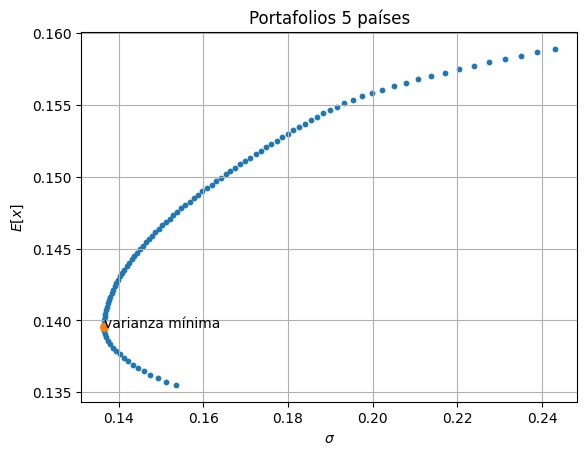

In [22]:
portafolio_5_varianza_minima = portfolio_5[portfolio_5.vol == portfolio_5.vol.min()]

plt.scatter(portfolio_5.vol, portfolio_5.media, s=10)
plt.text(portafolio_5_varianza_minima.vol, portafolio_5_varianza_minima.media, "varianza mínima")
plt.scatter(portafolio_5_varianza_minima.vol, portafolio_5_varianza_minima.media, s=30)


plt.grid()
plt.title("Portafolios 5 países")
plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")

In [23]:
w_minvar = min_var3.x

print("En el portafolio de mínima varianza con los 5 activos, el peso de Estados Unidos es de " + str(np.round(w_minvar[0] * 100, 2)) +
      "%, el del Reino Unido es de " + str(np.round(w_minvar[1] * 100, 2)) + "%, \nel de Francia es de " + str(np.round(w_minvar[2] * 100, 2)) +
      "%, el de Alemania es de " + str(np.round(w_minvar[3] * 100, 2)) + "% y el de Japón es de " + str(np.round(w_minvar[4] * 100, 2)) + "%.")

En el portafolio de mínima varianza con los 5 activos, el peso de Estados Unidos es de 61.78%, el del Reino Unido es de 0.0%, 
el de Francia es de 0.0%, el de Alemania es de 20.94% y el de Japón es de 17.28%.


In [24]:
e_minvar = eind.dot(w_minvar)
s_minvar = np.sqrt(varianza(w_minvar, sigma))

print("El rendimiento esperado del portafolio de mínima varianza con los 5 activos, es de " + str(np.round(e_minvar * 100, 4)) +
      "% y la volatilidad es de " + str(np.round(s_minvar * 100, 4)) + "%.")

El rendimiento esperado del portafolio de mínima varianza con los 5 activos, es de 13.9629% y la volatilidad es de 13.6447%.
